<a href="https://colab.research.google.com/github/FSDAwaesf/Detect-Person-Class-from-img-Collage-project/blob/main/Detect_Person_Class(Collage_project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2


In [ ]:
data_path = '/content/drive/MyDrive/Faces data/CroppedYale'
len(os.listdir(data_path))

38

#adding imgs to list with it's labels

In [ ]:
def read_img(path):
  files_names = os.listdir(path) 
  imgs = []
  target = []
  for i in files_names:
    for j in os.listdir(path+'/'+i):
      if '.pgm' in j:
        img = cv2.imread(path+'/'+i+'/'+j)
        imgs.append(img)
        target.append(i)
  return imgs,target

#X ==> Images
#y ==> labels

In [ ]:
from sklearn.model_selection import train_test_split
X,y = read_img(data_path)


In [ ]:
X = np.array(X)
y = np.array(y).reshape(-1,1)

#all images(192,168)

In [ ]:
def resize_images(images):
  imgs = []
  images1 = np.asarray(images)
  for i in images1:
    img = cv2.resize(i,(168, 192))
    imgs.append(img)

  return imgs

In [ ]:
images = resize_images(X)
images[1].shape

(192, 168, 3)

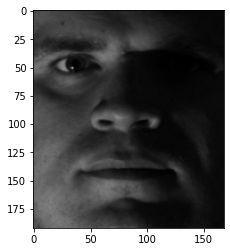

In [ ]:
plt.imshow(X[20])

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(images,y,test_size=0.1,shuffle=True,random_state=1)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train.shape

(2223, 192, 168, 3)

In [ ]:
y_train

array([['yaleB13'],
       ['yaleB10'],
       ['yaleB12'],
       ...,
       ['yaleB12'],
       ['yaleB08'],
       ['yaleB12']], dtype='<U7')

#CNN Model 1 ( without augmentation)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Activation,MaxPool2D,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(192,168,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))

model.add(Dense(units=38,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 190, 166, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 95, 83, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 93, 81, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 19, 64)      

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test.shape

(247, 38)

In [ ]:
X_train.shape

(2223, 192, 168, 3)

In [ ]:
train_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

In [ ]:
valid_size = len(X_train)*0.1
trainG = train_gen.flow(X_train,y_train,batch_size=20)
validG = valid_gen.flow(X_train[:int(valid_size),:],y_train[:int(valid_size),:],batch_size=10)

In [ ]:
steps_train = int(len(X_train)/20)
steps_validate = int(222/10)

In [ ]:
history = model.fit_generator(trainG,
                                  steps_per_epoch=steps_train, 
                                  epochs=3,
                                  validation_data=validG,
                                  validation_steps=steps_validate,
                                  verbose=1,
                                  shuffle = 1)

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


111/111 [==============================] - 60s 537ms/step - loss: 0.1084 - accuracy: 0.9846
Epoch 2/3
111/111 [==============================] - 60s 539ms/step - loss: 0.1916 - accuracy: 0.9837
Epoch 3/3
111/111 [==============================] - 59s 535ms/step - loss: 0.0879 - accuracy: 0.9868


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
m = np.argmax(y_pred[0])
m

9

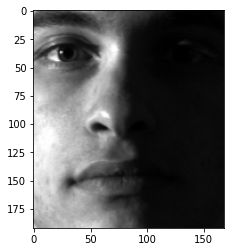

In [ ]:
plt.imshow(X_test[9])